In [2]:
# Library pengolahan data
import pandas as pd
import numpy as np

# Library visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#read data & cek
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#data shape
data.shape

(1338, 7)

In [5]:
#rata2 dari kolom
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
#rata2 umur perokok groupd by gender
data.groupby(['sex', 'smoker']).agg({'age':['mean']}).round()

age
               mean
sex    smoker      
female no      40.0
       yes     39.0
male   no      39.0
       yes     38.0

In [7]:
#rata2 charges perokok
data.groupby(['smoker']).agg({'charges':['mean']}).round()

,charges
,mean
smoker,
no,8434.0
yes,32050.0


In [8]:
#variansi tagihan perokok vs. non-perokok
data[data['smoker']== 'yes']['charges'].var()
data.groupby(['smoker']).var()

,age,bmi,children,charges
smoker,,,,
no,198.342438,36.519195,1.483855,3.592542e+07
yes,193.855097,39.925262,1.338801,1.332073e+08


In [9]:
#rata2 BMI dari perokok vs non perokok
data.groupby(['smoker','sex']).agg({'bmi':['mean']}).round(1)

bmi
               mean
smoker sex         
no     female  30.5
       male    30.8
yes    female  29.6
       male    31.5

In [10]:
#rata2 BMI dari perokok
data.groupby(['smoker']).agg({'bmi':['mean']}).round(1)

,bmi
,mean
smoker,
no,30.7
yes,30.7


In [11]:
#new column with BMI category
bmi_condition = [data['bmi'] < 18.5, data['bmi'] < 25, data['bmi'] < 30, data['bmi'] >= 30]
category = ["underweight", "healthy", "overweight", "obese"]

data['kategori'] = np.select(bmi_condition, category)
data.head()

,age,sex,bmi,children,smoker,region,charges,kategori
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,healthy
4,32,male,28.880,0,no,northwest,3866.85520,overweight


In [12]:
#rata2 tagihan
data.groupby(['smoker']).agg({'charges':['mean']}).round(0)

,charges
,mean
smoker,
no,8434.0
yes,32050.0


In [13]:
# rata2 tagihan perokok yang obese
data[data.kategori =='obese'].groupby(['smoker','kategori']).agg({'charges':['mean']}).round(2)

,,charges
,,mean
smoker,kategori,
no,obese,8842.69
yes,obese,41557.99


In [14]:
data.groupby(['smoker','kategori']).agg({'charges':['mean']}).round(2)

charges
                        mean
smoker kategori             
no     healthy       7685.66
       obese         8842.69
       overweight    8257.96
       underweight   5532.99
yes    healthy      19942.22
       obese        41557.99
       overweight   22495.87
       underweight  18809.82

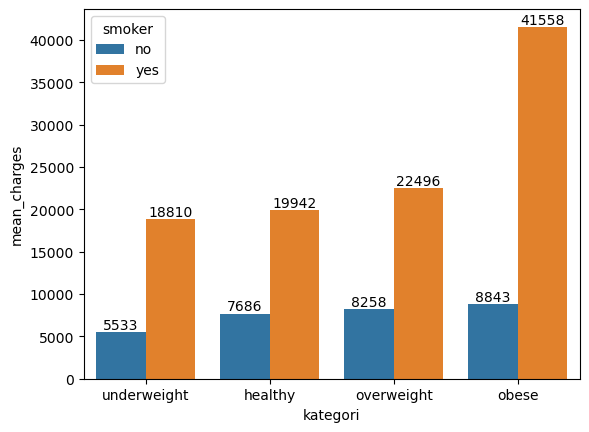

In [15]:
#visualisasi proporsi charges vs kategori
cat = data.groupby(['smoker', 'kategori']).agg(mean_charges=("charges", 'mean')).round()
cat = cat.reset_index()

order = ['underweight', 'healthy', 'overweight', 'obese']


ax = sns.barplot(x="kategori",
           y="mean_charges",
           hue="smoker",
           order = order,
           data=cat)
for i in ax.containers:
    ax.bar_label(i,)